The data below reads as follows:
    id corresponds to the index of each athlete
    
    Category corresponds to the sex and age bracket each runner falls in (i.e MAM = Male under 40 years, 
    WAM = Woman under 40 years, M40 = Male athlete between 40 and 45 years)
    
    km4week is the total number of kilometers run in the last 4 weeks before the marathon, marathon included.
    If, for example, the km4week is 100, the athlete has run 400 km in the four weeks before the marathon

    sp4week is the average speed of the athlete in the last 4 training weeks. The average counts all the kilometers
    done, included the slow kilometers done before and after the training. The average of the speed is 
    this number, and with time this is one of the numbers that has to be refined
    
    cross training: If the runner is also a cyclist, or a triathlete. How would training other disciplines affect 
    your timing?

    Wall21: In decimal. The tricky field. To acknowledge a good performance, as a marathoner, I have to run the 
    first half marathon with the same split of the second half. If, for example, I run the first half marathon 
    in 1h30m, I must finish the marathon in 3h (for doing a good job). If I finish in 3h20m, I started too fast
    and I hit "the wall". My training history is, therefore, less valid, since I was not estimating my result

    Marathon time: In decimal. This is the final result. Based on the training history, the marathon timing must 
    be predicted.


In [44]:
import pandas as pd

running_data = pd.read_csv('MarathonData.csv')
running_data.drop(['Name', 'Wall21', 'CATEGORY'], axis=1, inplace=True)

running_data

,id,Marathon,Category,km4week,sp4week,CrossTraining,MarathonTime
0,1,Prague17,MAM,132.8,14.434783,NaN,2.37
1,2,Prague17,MAM,68.6,13.674419,NaN,2.59
2,3,Prague17,MAM,82.7,13.520436,NaN,2.66
3,4,Prague17,M45,137.5,12.258544,NaN,2.68
4,5,Prague17,MAM,84.6,13.945055,NaN,2.74
...,...,...,...,...,...,...,...
82,83,Prague17,M55,50.0,10.830325,NaN,3.93
83,84,Prague17,M40,33.6,10.130653,ciclista 3h,3.93
84,85,Prague17,M40,55.4,11.043189,NaN,3.94
85,86,Prague17,M45,33.2,11.066667,NaN,3.95


In [45]:
running_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,87.0,44.000000,25.258662,1.000000,22.500000,44.000000,65.500000,87.00
km4week,87.0,62.347126,26.956019,17.900000,44.200000,58.800000,77.500000,137.50
sp4week,87.0,139.840706,1191.427864,8.031414,11.498168,12.163424,12.854036,11125.00
MarathonTime,87.0,3.319080,0.376923,2.370000,3.045000,3.320000,3.605000,3.98


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

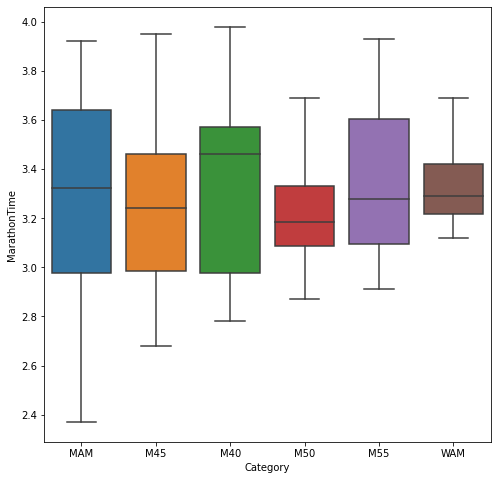

In [47]:
# Lets see the box plot
# It is very useful to handle the ouliers

# Lets create scatterplot of Category and MarathonTIme
plt.figure(figsize=(8,8))
sns.boxplot(x='Category',y='MarathonTime',data=running_data)
plt.show()

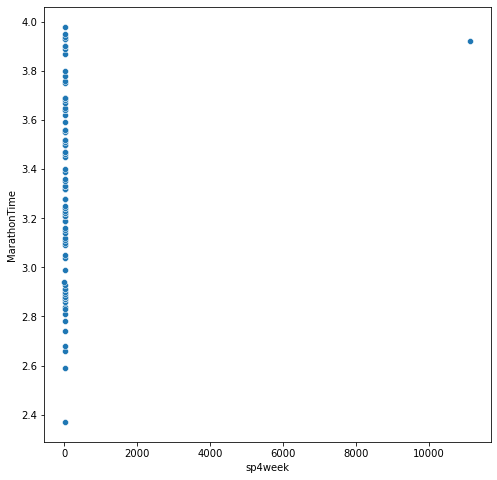

In [48]:
# Lets see the scatter plot
# Lets create scatterplot of sp4week and MarathonTime

plt.figure(figsize=(8,8))
sns.scatterplot(x='sp4week',y='MarathonTime',data=running_data)
plt.show()

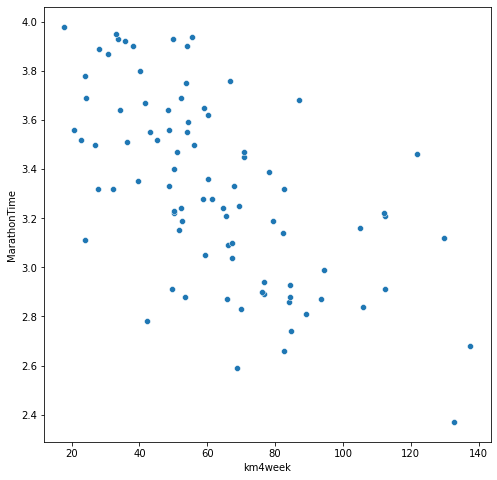

In [49]:
# Lets see the scatter plot
# Lets create scatterplot of km4week and MarathonTime

plt.figure(figsize=(8,8))
sns.scatterplot(x='km4week',y='MarathonTime',data=running_data)
plt.show()

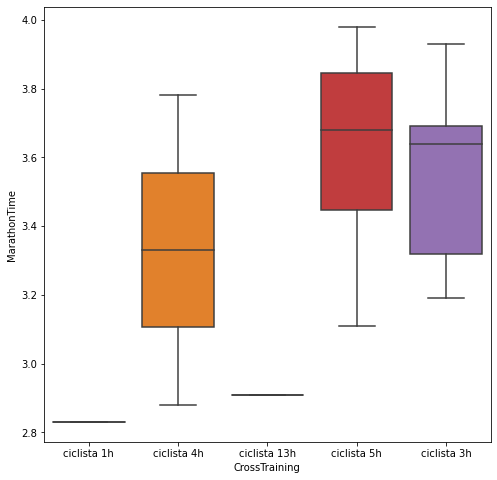

In [50]:
# Lets see the box plot
# It is very useful to handle the ouliers

# Lets create scatterplot of CrossTraining and MarathonTIme
plt.figure(figsize=(8,8))
sns.boxplot(x='CrossTraining',y='MarathonTime',data=running_data)
plt.show()

In [51]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
running_data['Marathon'] = label_encoder.fit_transform(running_data['Marathon'])
running_data['Category'] = label_encoder.fit_transform(running_data['Category'])
running_data['CrossTraining'] = label_encoder.fit_transform(running_data['CrossTraining'])

In [62]:
running_data

,id,Marathon,Category,km4week,sp4week,CrossTraining,MarathonTime
0,1,0,4,132.8,14.434783,5,2.37
1,2,0,4,68.6,13.674419,5,2.59
2,3,0,4,82.7,13.520436,5,2.66
3,4,0,1,137.5,12.258544,5,2.68
4,5,0,4,84.6,13.945055,5,2.74
...,...,...,...,...,...,...,...
82,83,0,3,50.0,10.830325,5,3.93
83,84,0,0,33.6,10.130653,2,3.93
84,85,0,0,55.4,11.043189,5,3.94
85,86,0,1,33.2,11.066667,5,3.95


In [63]:
running_data.describe()

,id,Marathon,Category,km4week,sp4week,CrossTraining,MarathonTime
count,87.000000,87.0,87.000000,87.000000,87.000000,87.000000,87.000000
mean,44.000000,0.0,2.850575,62.347126,139.840706,4.632184,3.319080
std,25.258662,0.0,1.889560,26.956019,1191.427864,1.001336,0.376923
min,1.000000,0.0,0.000000,17.900000,8.031414,0.000000,2.370000
25%,22.500000,0.0,1.000000,44.200000,11.498168,5.000000,3.045000
50%,44.000000,0.0,4.000000,58.800000,12.163424,5.000000,3.320000
75%,65.500000,0.0,4.000000,77.500000,12.854036,5.000000,3.605000
max,87.000000,0.0,6.000000,137.500000,11125.000000,5.000000,3.980000


In [52]:
# Create target object and call it y
y = running_data['MarathonTime']

# Create X
features = ['Marathon', 'Category', 'km4week', 'sp4week', 'CrossTraining']
X = running_data[features]

In [53]:
from sklearn.model_selection import train_test_split

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [54]:
from sklearn.tree import DecisionTreeRegressor

running_pred_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
running_pred_model.fit(train_X, train_y)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

In [55]:
val_predictions = running_pred_model.predict(val_X)

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

val_mae = mean_absolute_error(val_y, val_predictions)
val_mae

0.29545454545454547

In [57]:
val_mape = mean_absolute_percentage_error(val_y, val_predictions)
val_mape

0.08426688783464976

In [58]:
from sklearn.ensemble import RandomForestRegressor
# import joblib

#Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

#fit your model
rf_model.fit(train_X, train_y)

# #Save model to a file
# joblib.dump(rf_model, 'running-time-predictions.joblib')

# rf_model = joblib.load('running-time-predictions.joblib')

RandomForestRegressor(random_state=1)

In [59]:
rf_val_predictions = rf_model.predict(val_X)

In [60]:
# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mean_absolute_error(val_y, rf_val_predictions)
rf_val_mae

0.2148363636363631

In [61]:
rf_val_mape = mean_absolute_percentage_error(rf_val_predictions, val_y)
rf_val_mape

0.06500405214225896

In [ ]:
# Marathon = int(input("How may Marathons have you run?:"))
# Category = int(input("Which category do you fall under? [0 = M40, 1 = M45, 2 = WAM, 3 = M55, 4 = MAM, 5 = W45, 6 = W55]:"))
# km4week = float(input("How many km have you run in the last 4 weeks?:"))
# sp4week = float(input("What was your average speed in the last 4 weeks?:"))
# CrossTraining = int(input("Have you trained in any other disciplines in the last 4 weeks and how long? (i.e 2 = Cycling, 5 = NaN)"))

# userInput = [Marathon, Category, km4week, sp4week, CrossTraining]

In [69]:
# result = rf_model.predict([userInput])[0]
# print(result)